In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/NSEI.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df.drop(['Open','High','Low','Adj Close','Volume'],inplace=True,axis=1)

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805
...,...
2023-08-28,19306.050780
2023-08-29,19342.650390
2023-08-30,19347.449220


In [8]:
nifty = df.asfreq('b').copy()

In [9]:
nifty['Close'] = nifty['Close'].fillna(method='ffill')

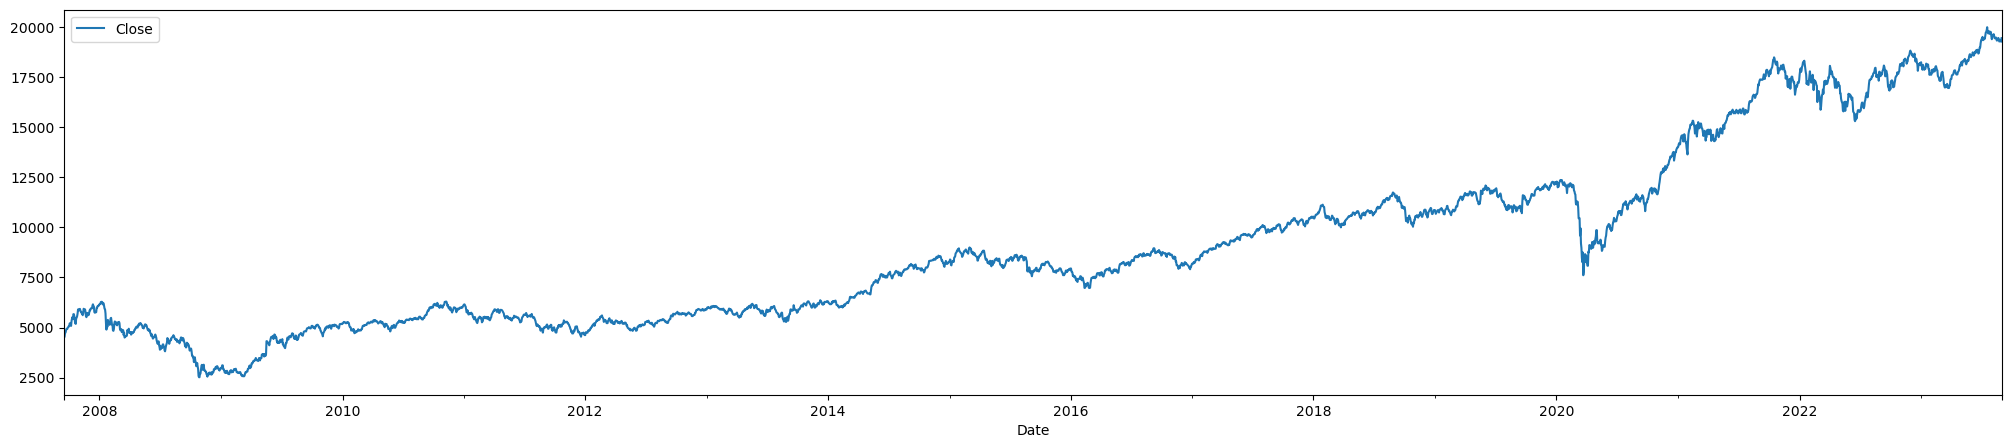

In [10]:
nifty.plot(figsize=(25,5))
plt.show()

In [27]:
def my_auto_corr(df,nlags=2):
    def autocorr(y,lag=2):
        y = np.array(y)
        y_bar = np.mean(y)
        denominator = sum((y-y_bar) **2)
        num1 = y[lag:]-y_bar
        num2 = y[:-lag]-y_bar
        num = sum(num1*num2)
        return num/denominator
    acf = [1]
    for i in range(1, nlags+1):
        acf.append(autocorr(df.iloc[:,0].values,lag=i))
    return (np.array(acf))

from statsmodels.graphics import tsaplots
print ('my auto corr', '\n',my_auto_corr(nifty,10))

print ('statsmodelscorr','\n',tsaplots.acf(nifty.iloc[:,0].values,nlags=10))


my auto corr 
 [1.         0.99889985 0.99781221 0.99672103 0.99564452 0.99456383
 0.99346707 0.99239808 0.99131561 0.99023005 0.98911778]
statsmodelscorr 
 [1.         0.99889985 0.99781221 0.99672103 0.99564452 0.99456383
 0.99346707 0.99239808 0.99131561 0.99023005 0.98911778]


In [16]:
nifty.iloc[:,0].values

array([ 4494.649902,  4546.200195,  4732.350098, ..., 19347.44922 ,
       19253.80078 , 19435.30078 ])

In [17]:
y = nifty.iloc[:,0].values

In [20]:
y[1:]

array([ 4546.200195,  4732.350098,  4747.549805, ..., 19347.44922 ,
       19253.80078 , 19435.30078 ])

In [23]:
y[:-1]

array([ 4494.649902,  4546.200195,  4732.350098, ..., 19342.65039 ,
       19347.44922 , 19253.80078 ])